In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
file_path = '/Users/shakthimaha/development/Urban/data/processed/cleaned_buildingEEandER.parquet'
df = pd.read_parquet(file_path)

In [17]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   FloorCount  TotalFloorArea  FootprintArea  EnergyEfficiency EnergyRating  \
0         2.0             0.0         206.57              61.0            D   
1         2.0             0.0         420.45              63.0            D   
2         2.0             0.0         237.01              61.0            D   
3         2.0             0.0         297.22              61.0            D   
4         2.0             0.0          54.30              61.0            D   

          Ward         Borough  MixClass  
0  Cripplegate  CITY OF LONDON       7.0  
1  Cripplegate  CITY OF LONDON       7.0  
2  Cripplegate  CITY OF LONDON       1.0  
3  Cripplegate  CITY OF LONDON       1.0  
4  Cripplegate  CITY OF LONDON       1.0  


In [18]:
df = df[["TotalFloorArea", "EnergyEfficiency"]]
df

,TotalFloorArea,EnergyEfficiency
0,0.0,61.0
1,0.0,63.0
2,0.0,61.0
3,0.0,61.0
4,0.0,61.0
...,...,...
1963642,109.0,61.0
1963643,109.0,61.0
1963644,109.0,61.0
1963645,109.0,61.0


In [19]:
df.describe()

,TotalFloorArea,EnergyEfficiency
count,1.963647e+06,1.963647e+06
mean,2.147115e+02,6.035334e+01
std,3.496904e+03,9.046637e+00
min,0.000000e+00,-1.039000e+03
25%,8.700000e+01,6.100000e+01
50%,1.090000e+02,6.100000e+01
75%,1.500000e+02,6.100000e+01
max,1.211826e+06,2.240000e+02


In [20]:
df = df[df["EnergyEfficiency"] > 0]  # Remove unrealistic values

In [21]:
Q1 = df["TotalFloorArea"].quantile(0.25)
Q3 = df["TotalFloorArea"].quantile(0.75)
IQR = Q3 - Q1

# Define a reasonable floor area range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["TotalFloorArea"] >= lower_bound) & (df["TotalFloorArea"] <= upper_bound)]

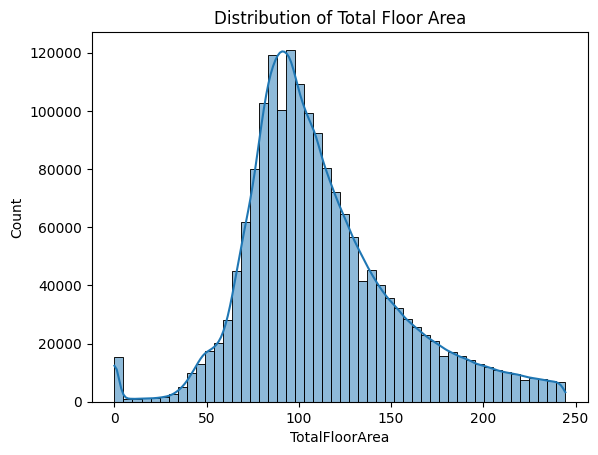

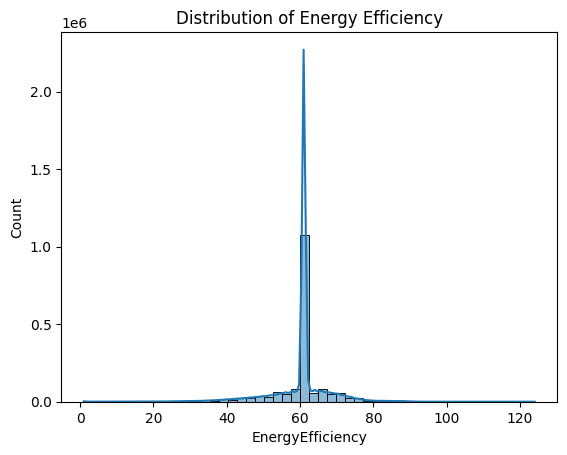

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["TotalFloorArea"], bins=50, kde=True)
plt.title("Distribution of Total Floor Area")
plt.show()

sns.histplot(df["EnergyEfficiency"], bins=50, kde=True)
plt.title("Distribution of Energy Efficiency")
plt.show()

In [23]:
df[["TotalFloorArea", "EnergyEfficiency"]].corr()

,TotalFloorArea,EnergyEfficiency
TotalFloorArea,1.000000,-0.050277
EnergyEfficiency,-0.050277,1.000000


In [24]:
print(df["EnergyEfficiency"].min())  # Should be > 0

1.0
